## Visualizing the solutions of harmonic oscillator problem.   

In [76]:
# First load the numpy/scipy/matplotlib
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

#load interactive widgets
import ipywidgets as widgets
from IPython.display import display

In [139]:
#Import hermite polynomials
from scipy.special import hermite
from math import factorial

### Eigenfunctions and eigenvalues of Harmonic oscillator problem

The harmonic oscillator is often used as an approximate model for the behaviour of some quantum systems, for example the vibrations of a diatomic molecule. Potential energy is a simple quadratic function of dsiplacement: $V(x)=\frac{1}{2}kx^2$ 

- The Schrödinger equation for a particle of mass m moving in one dimension in a potential 
$$
H = -\frac{\hbar^{2}}{2m} \frac{d^{2}}{d x^{2}} + \frac{1}{2} kx^{2}.
$$

- The eigenfunctions are expressed in terms of Hermite polynomials $H_v(x)$, special functions well known in mathematical physics. Where $N_v$ is a normalization factor.

$$\psi(x) = N_v \cdot H_v(x) \cdot e^{-x^2/2}$$

$$H_v(x) = (-1)^v (e^{x^2})\frac{d^v}{dx^v} (e^{-x^2})$$

$$N_v = (\sqrt{\pi} 2^v v!)^{-1/2}$$

- The eigenvalues are a simple function of quantum number v:

$$E(v)= h\nu \Big (v+\frac{1}{2}\Big) $$


### Hermite polynomials

-Definition:

$$H_v(x) = (-1)^v (e^{x^2})\frac{d^v}{dx^v} (e^{-x^2})$$

-Recursion relation:

$$x H_v(x) = v H_{v-1}+\frac{1}{2} H_{v+1}(x)$$

![](./images/hermite2.gif)

Text(0,0.5,'$H_n(x)$')

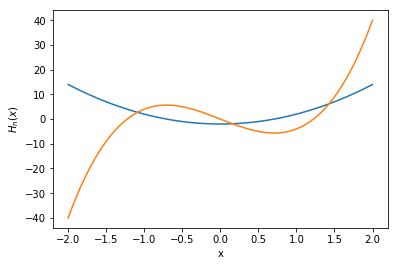

In [127]:
P1=hermite(2)
P2=hermite(3)

x=np.linspace(-2,2,1000)

H1, H2 = P1(x), P2(x)

plt.plot(x,H1)
plt.plot(x,H2)

plt.xlabel('x')
plt.ylabel(r'$H_n(x)$')

In [128]:
# Check orthogonality
psi4=ph4(x)*np.exp(-0.5*x**2)
psi5=ph5(x)*np.exp(-0.5*x**2)

psi4 @ psi5

-1.7763568394002505e-14

In [144]:
# Normalization? Integrate function with trapezoidal
from scipy.integrate import trapz

trapz(H1, x)

23.094084816443157

### Harmonic oscillator wave functions

In [135]:
def N(v):
    '''Normalization constant '''
    
    return 1./np.sqrt(np.sqrt(np.pi)*2**v*factorial(v))

def E(v):
    '''Energy'''
    
    return (v + 0.5)

def psi(v, x):
    """Return the harmonic oscillator wavefunction for level v on grid q."""
    
    Hr=hermite(v)
    
    Psix = N(v)*Hr(x)*np.exp(-0.5*x**2)
    
    return Psix

def get_potential(x):
    """Return potential energy on scaled oscillator displacement grid q."""
    return 0.5*x**2

In [176]:
# plot up to level vmax
VMAX=8 

# Range of x determine by classical tunring points:
xmin, xmax = -np.sqrt(2*E(VMAX)), np.sqrt(2*E(VMAX))

x = np.linspace(xmin, xmax, 1000)

In [175]:
#Orhtogonality
psi(3,x) @ psi(4,x)

-6.832425250569152e-15

In [174]:
# Normalization
trapz(psi(2,x)**2,x)

0.9999966228099587

Text(0,0.5,'$\\psi^2_n(x)$')

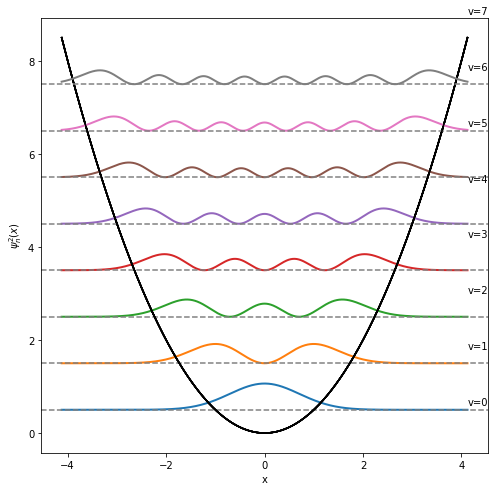

In [209]:
fig, ax = plt.subplots(figsize=(8,8))

for v in range(8):
    
    ax.plot(x,get_potential(x),color='black')
    
    ax.plot(x,psi(v,x)**2+E(v),lw=2)
    
    # add lines and labels
    ax.axhline(E(v), color='gray', linestyle='--') 
    ax.text(xmax, 1.2*E(v), f"v={v}")

    
ax.set_xlabel('x')
ax.set_ylabel('$\psi^2_n(x)$')